# Sentiment Analysis of the 2024 US Presidential Election on Reddit: Kamala Harris vs. Donald Trump   

In this notebook we examine public sentiment surrounding Kamala Harris and Donald Trump, the key candidates of the 2024 US Presidential Election, by analyzing Reddit comments from the most upvoted posts in politically active subreddits.  

To classify sentiment, we used a RoBERTa-based model fine-tuned for social media sentiment analysis, categorizing comments into positive, neutral, or negative. The analysis highlights trends in public opinion over time offering a snapshot of the evolving political discourse as the election draws closer.  


# Importing Necessary Libraries

In [ ]:
import praw
import pandas as pd
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings("ignore")

# Setting Up Reddit API
We use the `praw` library to interact with Reddit. Below, we authenticate using the Reddit API with a client ID, client secret, and user agent.


In [ ]:
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Set up Reddit API authentication using environment variables
reddit = praw.Reddit(
    client_id=os.getenv('REDDIT_CLIENT_ID'),
    client_secret=os.getenv('REDDIT_CLIENT_SECRET'),
    user_agent=os.getenv('REDDIT_USER_AGENT')
)

# Verify authentication
if not reddit.read_only:
    raise Exception("Authentication failed!")

# Fetching Reddit Data
The `fetch_reddit_data` function retrieves Reddit posts and comments based on specified keywords and subreddits.

We use as the start date `2024-07-21` because it marks the announcement of Kamala Harris's 2024 presidential campaign.

We will analyze the top posts ranked by upvotes to ensure we focus on the most impactful content.


In [ ]:
def fetch_reddit_data(keywords, subreddits, limit=300, start_date=None, end_date=None):
    data = []
    # Convert the start and end dates to Unix timestamps
    start_timestamp = datetime.datetime.strptime(start_date, '%Y-%m-%d').timestamp() if start_date else None
    end_timestamp = datetime.datetime.strptime(end_date, '%Y-%m-%d').timestamp() if end_date else None

    for subreddit in subreddits:
        subreddit_obj = reddit.subreddit(subreddit)
        for keyword in keywords:
            # Fetch posts and iterate through them
            for submission in subreddit_obj.search(keyword, limit=1000):
                # Only include posts within the date range
                if start_timestamp and submission.created_utc < start_timestamp:
                    continue  # Skip posts before the start date
                if end_timestamp and submission.created_utc > end_timestamp:
                    continue  # Skip posts after the end date

                submission.comments.replace_more(limit=0)  # Flatten comments
                comments = [comment.body for comment in submission.comments.list()]
                data.append({
                    'id': submission.id,
                    'title': submission.title,
                    'selftext': submission.selftext,
                    'comments': comments,
                    'upvotes': submission.score,
                    'subreddit': subreddit,
                    'created_utc': submission.created_utc,
                })

    # Sort the collected data by upvotes in descending order
    sorted_data = sorted(data, key=lambda x: x['upvotes'], reverse=True)

    processed_data = []
    for item in sorted_data[:limit]:
        # Extract the main post text
        post_text = item['title'] + ' ' + item['selftext']

        # Process each comment
        for comment in item['comments']:
            processed_data.append({
                'post_id': item['id'],
                'subreddit': item['subreddit'],
                'created_date': datetime.datetime.fromtimestamp(item['created_utc']),
                'post_text': post_text,  # Text of the main post
                'comment_text': comment,  # Text of the comment
                'upvotes': item['upvotes']
            })

    return pd.DataFrame(processed_data)

keywords = ["Kamala Harris", "Donald Trump"]
subreddits = ["politics", "conservative", "liberal"]
start_date = "2024-07-21"
end_date = "2024-11-01"

df = fetch_reddit_data(keywords, subreddits, limit=130, start_date=start_date, end_date=end_date)
df.head()

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

,post_id,subreddit,created_date,post_text,comment_text,upvotes
0,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,"\nAs a reminder, this subreddit [is for civil discussion.](/r/politics/wiki/index#wiki_be_civil)\n\nIn general, be courteous to others. Debate/discuss/argue the merits of ideas, don't attack people. Personal insults, shill or troll accusations, hate speech, any suggestion or support of harm, violence, or death, and other rule violations can result in a permanent ban. \n\nIf you see comments in violation of our rules, please report them.\n\n For those who have questions regarding any media outlets being posted on this subreddit, please click [here](https://www.reddit.com/r/politics/wiki/approveddomainslist) to review our details as to our approved domains list and outlet criteria.\n \n We are actively looking for new moderators. If you have any interest in helping to make this subreddit a place for quality discussion, please fill out [this form](https://docs.google.com/forms/d/1y2swHD0KXFhStGFjW6k54r9iuMjzcFqDIVwuvdLBjSA).\n \n\n***\n\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/politics) if you have any questions or concerns.*",80338
1,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,[deleted],80338
2,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,She ended with the \n\n> Taylor Swift\n\n>Childless Cat Lady\n\nJD Vance can't escape from this ever. lol,80338
3,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,[deleted],80338
4,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,Interrupted CNN and everything,80338


# Removing Bot-Like and Deleted Comments
Reddit posts often includes bot-generated comments, moderator messages, or placeholder comments like `[deleted]` and `[removed]`. These do not contribute meaningful insights for sentiment analysis.

The `remove_bot_comments` function:
- Filters out bot-related comments using predefined patterns.
- Removes placeholder comments such as `[deleted]` and `[removed]`.


In [ ]:
import re

def remove_bot_and_deleted_comments(df):
    # Define patterns to identify bot-like comments and placeholder comments
    bot_patterns = [
        r"I am a bot",  # Common bot disclaimer
        r"this action was performed automatically",  # Bot-like message
        r"contact the moderators",  # Moderator message
        r"https?://",  # Any URLs
        r"\n{2,}",  # Multiple newlines
        r"we are actively looking for new moderators",  # Moderator recruitment
        r"^\[deleted\]$",  # Placeholder for deleted comments
        r"^\[removed\]$",  # Placeholder for removed comments
    ]

    # Combine all patterns into a single regex
    combined_pattern = "|".join(bot_patterns)

    # Filter out rows where 'comment_text' matches the patterns
    cleaned_df = df[~df['comment_text'].str.contains(combined_pattern, case=False, na=False)]

    return cleaned_df

df_cleaned = remove_bot_and_deleted_comments(df)
df_cleaned.head()

,post_id,subreddit,created_date,post_text,comment_text,upvotes
4,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,Interrupted CNN and everything,80338
8,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,Trump and his Russian bot army are having a very bad day.,80338
9,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,284M followers. Yikes.,80338
11,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,"I'm in my ""WE ARE NOT GOING BACK"" Era!",80338
12,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,Mike Tyson couldn't have delivered a harder one-two punch than what Trump's getting tonight.,80338


# Preprocessing Text Data
To prepare the data for analysis, the `preprocess_text` function:
- Removes HTML tags and special characters.
- Converts emojis to text descriptions.
- Converts text to lowercase and tokenizes it.
- Removes stop words and applies lemmatization.


In [ ]:
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')


def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r"<.*?>", "", text)  # Remove HTML tags only

    # Convert emojis to text descriptions
    text = emoji.demojize(text)

    # Remove special characters
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Keeps only alphabetic text

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Apply lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    processed_text = " ".join(tokens)

    return processed_text

df_cleaned['processed_text'] = df_cleaned['comment_text'].apply(preprocess_text)
df_processed = df_cleaned[df_cleaned['processed_text'].notna() & df_cleaned['processed_text'].str.strip() != ""]
df_processed.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,post_id,subreddit,created_date,post_text,comment_text,upvotes,processed_text
4,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,Interrupted CNN and everything,80338,interrupted cnn everything
8,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,Trump and his Russian bot army are having a very bad day.,80338,trump russian bot army bad day
9,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,284M followers. Yikes.,80338,follower yikes
11,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,"I'm in my ""WE ARE NOT GOING BACK"" Era!",80338,im going back era
12,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,Mike Tyson couldn't have delivered a harder one-two punch than what Trump's getting tonight.,80338,mike tyson couldnt delivered harder onetwo punch trump getting tonight


# Defining Keywords and Classifying Comments
To analyze sentiment, we first classify comments based on their mentions of Kamala Harris or Donald Trump.

### Steps:
1. **Define Keywords:** We use specific keywords associated with each candidate (e.g., "kamala", "trump", "maga").
2. **Direct Mentions:** Check if a comment mentions only Kamala Harris, only Donald Trump, both, or neither using these keywords.
3. **Pronouns and Context:** Use pronouns (e.g., "he", "she") and post context if direct mentions are ambiguous.


In [ ]:
# Keywords for candidates
kamala_keywords = ["kamala", "harris", "vp", "democrat", "biden", "democratic party"]
trump_keywords = ["trump", "donald", "gop", "maga", "republican", "former president"]

def classify_comment(row):
    comment = row["processed_text"]
    post_text = row["post_text"].lower()

    # Step 1: Check for direct mentions using more specific keywords
    kamala_mentions = sum(1 for keyword in kamala_keywords if keyword in comment)
    trump_mentions = sum(1 for keyword in trump_keywords if keyword in comment)

    # Case 1: If only one candidate is mentioned directly
    if kamala_mentions > 0 and trump_mentions == 0:
        return "Kamala"
    elif trump_mentions > 0 and kamala_mentions == 0:
        return "Trump"
    # Case 2: If both candidates are mentioned directly
    elif kamala_mentions > 0 and trump_mentions > 0:
        return "Both"
    else:
        # Step 2: Check pronouns only if no direct mentions were found
        pronouns = re.findall(r"\b(he|she|him|her)\b", comment)
        if pronouns:
            # Check post context before assigning based on pronouns
            if ("she" in pronouns or "her" in pronouns) and any(k in post_text for k in kamala_keywords):
                return "Kamala"
            elif ("he" in pronouns or "him" in pronouns) and any(t in post_text for t in trump_keywords):
                return "Trump"

        # Step 3: If still no classification, check post context
        if any(k in post_text for k in kamala_keywords):
            return "Kamala"
        elif any(t in post_text for t in trump_keywords):
            return "Trump"

df_processed["candidate"] = df_processed.apply(classify_comment, axis=1)
df_processed.head(2)

,post_id,subreddit,created_date,post_text,comment_text,upvotes,processed_text,candidate
4,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,Interrupted CNN and everything,80338,interrupted cnn everything,Kamala
8,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,Trump and his Russian bot army are having a very bad day.,80338,trump russian bot army bad day,Trump
9,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,284M followers. Yikes.,80338,follower yikes,Kamala
11,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,"I'm in my ""WE ARE NOT GOING BACK"" Era!",80338,im going back era,Kamala
12,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,Mike Tyson couldn't have delivered a harder one-two punch than what Trump's getting tonight.,80338,mike tyson couldnt delivered harder onetwo punch trump getting tonight,Trump


# Handling Comments Mentioning Both Candidates
Some comments mention both Kamala Harris and Donald Trump. To handle this, we:
1. **Identify Both Mentions:** Split comments containing references to both candidates into separate parts.
2. **Assign Candidates:** Use context to classify one part to Kamala and the other to Trump.

In [ ]:
def split_comments(row):
    if row["candidate"] == "Both":
        comment = row["comment_text"]
        # Split only if both candidates are actually mentioned
        if any(k in comment.lower() for k in kamala_keywords) and any(t in comment.lower() for t in trump_keywords):
            kamala_comment = re.sub(r"\b(?:" + "|".join(trump_keywords) + r")\b.*", "", comment, flags=re.IGNORECASE).strip()
            trump_comment = re.sub(r".*\b(?:" + "|".join(kamala_keywords) + r")\b", "", comment, flags=re.IGNORECASE).strip()

            return pd.DataFrame([
                {**row, "comment_text": kamala_comment, "candidate": "Kamala"},
                {**row, "comment_text": trump_comment, "candidate": "Trump"}
            ])

    return pd.DataFrame([row])

df_split = df_processed.apply(split_comments, axis=1)
df_final = pd.concat(df_split.tolist(), ignore_index=True)
df_final.head(2)

,post_id,subreddit,created_date,post_text,comment_text,upvotes,processed_text,candidate
0,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,Interrupted CNN and everything,80338,interrupted cnn everything,Kamala
1,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,Trump and his Russian bot army are having a very bad day.,80338,trump russian bot army bad day,Trump
2,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,284M followers. Yikes.,80338,follower yikes,Kamala
3,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,"I'm in my ""WE ARE NOT GOING BACK"" Era!",80338,im going back era,Kamala
4,1fe0c4x,politics,2024-09-11 03:08:35,Taylor Swift endorses Kamala Harris,Mike Tyson couldn't have delivered a harder one-two punch than what Trump's getting tonight.,80338,mike tyson couldnt delivered harder onetwo punch trump getting tonight,Trump


# Candidate-Based Exploratory Data Analysis
We perform a detailed analysis of the dataset to explore trends and patterns based on the candidates Kamala Harris and Donald Trump. The analysis includes:
1. Overview of post counts and upvotes.
2. Temporal trends of activity over time.
3. Text analysis using word clouds.


# Post Counts and Upvotes
Analyzing the number of comments and average upvotes per candidate.


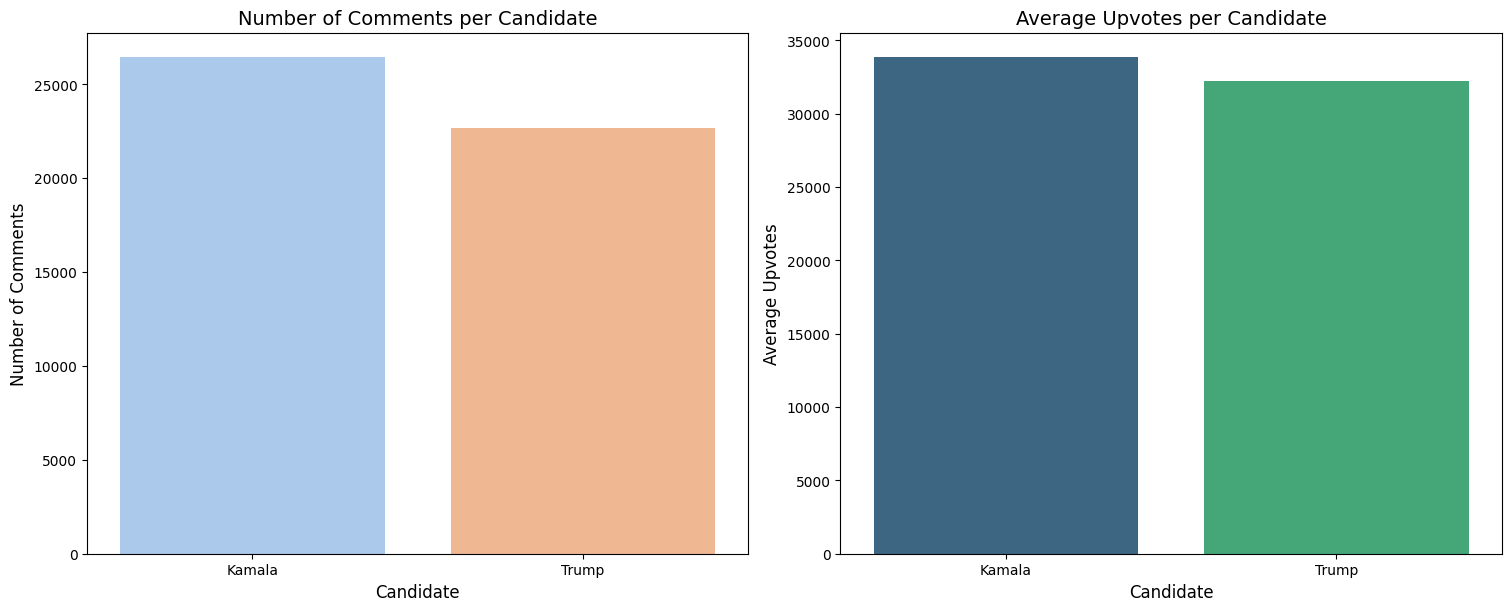

In [ ]:
# General Overview
candidate_counts = df_final['candidate'].value_counts()
candidate_upvotes = df_final.groupby('candidate')['upvotes'].mean()

# Create side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), constrained_layout=True)

# Bar Plot for Post Counts
sns.barplot(ax=axes[0], x=candidate_counts.index, y=candidate_counts.values, palette="pastel")
axes[0].set_title('Number of Comments per Candidate', fontsize=14)
axes[0].set_xlabel('Candidate', fontsize=12)
axes[0].set_ylabel('Number of Comments', fontsize=12)

# Bar Plot for Average Upvotes
sns.barplot(ax=axes[1], x=candidate_upvotes.index, y=candidate_upvotes.values, palette="viridis")
axes[1].set_title('Average Upvotes per Candidate', fontsize=14)
axes[1].set_xlabel('Candidate', fontsize=12)
axes[1].set_ylabel('Average Upvotes', fontsize=12)

plt.show()

# Temporal Trends
Visualizing daily activity by candidate over the selected timeframe.


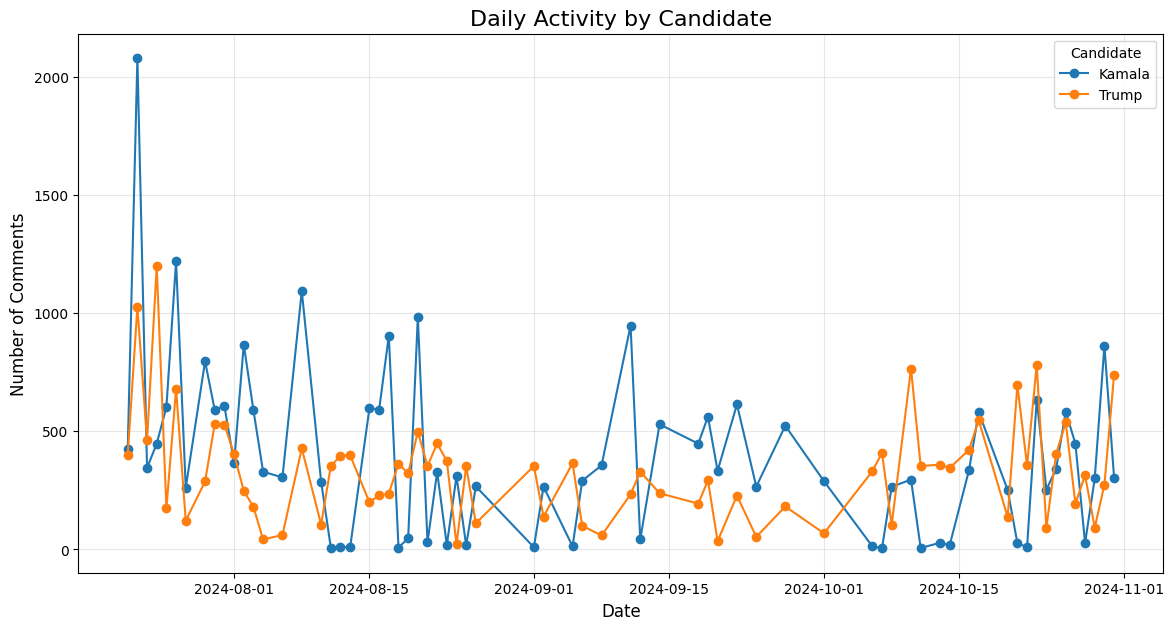

In [ ]:
# Temporal Trends
df_final['created_date'] = pd.to_datetime(df_final['created_date'])
daily_activity = df_final.groupby([df_final['created_date'].dt.date, 'candidate']).size().unstack().fillna(0)

# Plotting temporal trends
plt.figure(figsize=(14, 7))
for candidate in daily_activity.columns:
    plt.plot(daily_activity.index, daily_activity[candidate], marker='o', label=candidate)

plt.title('Daily Activity by Candidate', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.legend(title='Candidate', fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# Word Cloud
Creating word clouds to visualize frequently used words for each candidate.


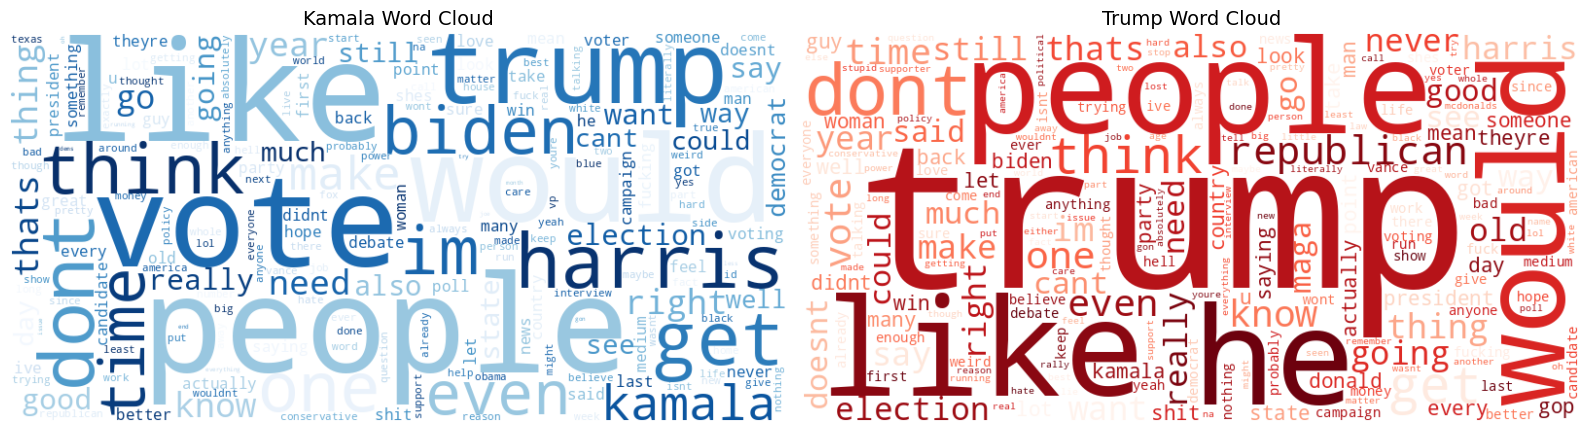

In [ ]:
from wordcloud import WordCloud
from collections import Counter

kamala_words = Counter(" ".join(df_final[df_final['candidate'] == 'Kamala']['processed_text']).split())
trump_words = Counter(" ".join(df_final[df_final['candidate'] == 'Trump']['processed_text']).split())

# Wordcloud
kamala_wc = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate_from_frequencies(kamala_words)
trump_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(trump_words)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(kamala_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Kamala Word Cloud', fontsize=14)

plt.subplot(1, 2, 2)
plt.imshow(trump_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Trump Word Cloud', fontsize=14)

plt.tight_layout()
plt.show()

# Sentiment Analysis
In this part of the analysis, we perform sentiment analysis on the comments related to each candidate. We use a RoBERTa-based model for sentiment classification, categorizing sentiments as positive, neutral, or negative. The results are aggregated and visualized to explore the distribution of sentiments over time and by candidate.


In [ ]:
from transformers import pipeline

# Load RoBERTa-based sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


# Sentiment Label Mapping and Analysis
The sentiment analysis model assigns labels as `LABEL_0`, `LABEL_1`, and `LABEL_2` corresponding to negative, neutral, and positive sentiments. We map these labels to meaningful sentiment categories and apply the sentiment analysis on the processed text.


In [ ]:
def analyze_sentiment(text):
    result = sentiment_analyzer(text)[0]
    label_map = {'LABEL_0': 'negative', 'LABEL_1': 'neutral', 'LABEL_2': 'positive'}
    return label_map[result['label']], result['score']

df_final['sentiment'], df_final['sentiment_score'] = zip(*df_final['processed_text'].apply(analyze_sentiment))

# Sentiment Distribution by Candidate
We now aggregate the sentiment counts for each candidate to understand the overall sentiment distribution.

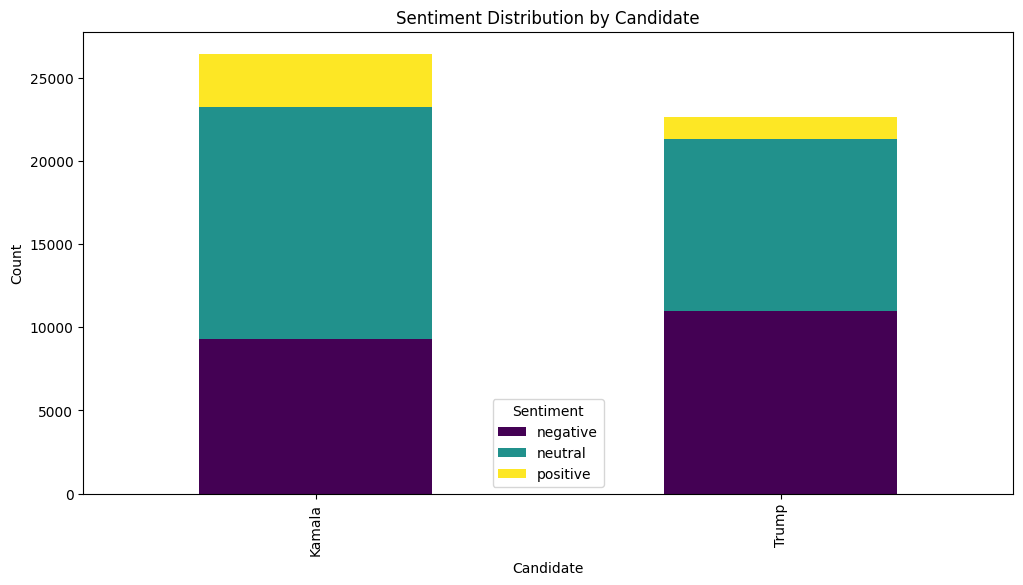

Sentiment Distribution (Percentage):
sentiment   negative    neutral   positive
candidate                                 
Kamala     35.241158  52.555324  12.203518
Trump      48.488726  45.545603   5.965671


In [ ]:
# Aggregate Sentiment Scores by Candidate
sentiment_summary = df_final.groupby(['candidate', 'sentiment']).size().unstack(fill_value=0)

# Visualize Sentiment Distribution
sentiment_summary.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Sentiment Distribution by Candidate')
plt.ylabel('Count')
plt.xlabel('Candidate')
plt.legend(title='Sentiment')
plt.show()

# Calculate the percentage of each sentiment for each candidate
sentiment_percentage = sentiment_summary.div(sentiment_summary.sum(axis=1), axis=0) * 100
print("Sentiment Distribution (Percentage):")
sentiment_percentage

# Temporal Sentiment Trends
Next, we explore how sentiment varies over time by candidate. This analysis visualizes sentiment trends on a daily basis, allowing us to see how public sentiment changes as we approach the election period.


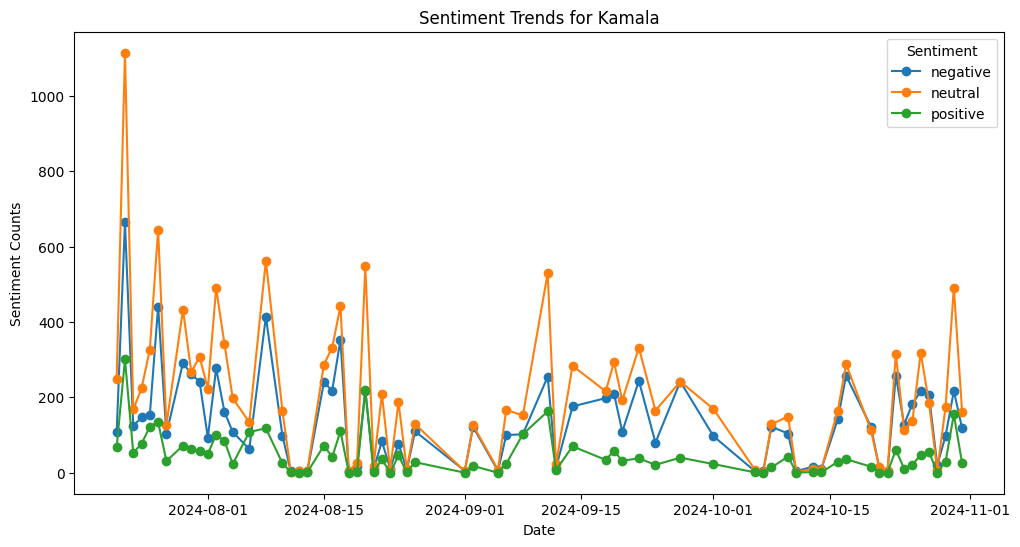

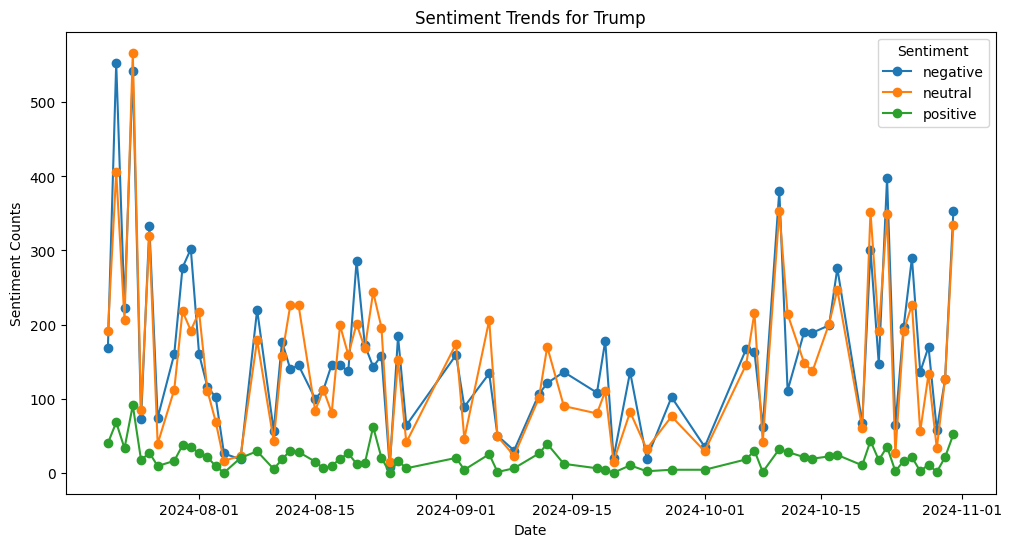

In [ ]:
# Temporal Sentiment Trends
df_final['created_date'] = pd.to_datetime(df_final['created_date'])
temporal_sentiment = df_final.groupby([df_final['created_date'].dt.date, 'candidate', 'sentiment']).size().unstack(fill_value=0)

# Line Plot for Temporal Trends
for candidate in df_final['candidate'].unique():
    subset = temporal_sentiment.xs(candidate, level=1)
    subset.plot(figsize=(12, 6), title=f'Sentiment Trends for {candidate}', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Counts')
    plt.legend(title='Sentiment')
    plt.show()


 The sentiment analysis reveals distinct patterns in public discussions about Kamala Harris and Donald Trump during the 2024 election period. Conversations about Kamala Harris leaned more neutral and slightly positive, while Donald Trump faced a heavier share of negative sentiment.  

As the results of the election approach, one can only wonder: will these online sentiments mirror the polls, or will the ballot box tell a different story?  
